# Application for TSAS

This document has been published for reproducing the application presented in a conference paper dedicated to AeroMAPS, focuding on the reproduction of ICAO LTAG scenarios. The different assumptions of this prospective scenario are given in the following. 

> **⚠ This notebook has been developed with the AeroMAPS version v0.7.1-beta for obtaining the paper results. However, this notebook has been or could be modified in order to be executable with the latest versions of AeroMAPS, which sometimes leads to different results compared to the ones from the paper, due to some models' modifications. In order to retrieve the results of the paper, one can use the v0.4.2-beta version associated with the original notebook.**

## Load

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_bottom_up,
    models_efficiency_top_down,
    models_efficiency_top_down_interp,
    models_energy_with_fuel_effect,
    models_offset,
    models_climate_fair,
    models_sustainability,
    models_energy_cost_complex,
    models_operation_cost_top_down,
    models_production_cost,
    models_abatements_cost_simplified,
)
from aeromaps.utils.functions import create_partitioning, merge_json_files

## Partitioning for international aviation

In [2]:
create_partitioning(file="data_tsas/aeroscope_international_data.csv", path="data_tsas")

## Models

In [3]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down_interp": models_efficiency_top_down_interp,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_fair": models_climate_fair,
    "models_energy_cost_complex": models_energy_cost_complex,
    "models_operation_cost_top_down": models_operation_cost_top_down,
    "models_abatements_cost_simplified": models_abatements_cost_simplified,
}

## Process, data and compute

In [4]:
unit_test = False

In [5]:
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is0high_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is0high_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is0low_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is0low_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is0medium_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is0medium_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is1high_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is1high_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is1low_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is1low_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is1medium_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is1medium_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is2high_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is2high_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is2low_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is2low_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is2medium_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is2medium_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is3high_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is3high_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is3low_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is3low_inputs.json",
)
merge_json_files(
    "data_tsas/partitioned_inputs.json",
    "data_tsas/ltag_data_inputs/is3medium_inputs.json",
    "data_tsas/partitioned_ltag_data_inputs/partitioned_is3medium_inputs.json",
)

In [6]:
if unit_test:
    process_test = create_process(
        configuration_file="data_tsas/config_files/config_is3medium.json", models=models
    )
else:
    process_is0high = create_process(
        configuration_file="data_tsas/config_files/config_is0high.json", models=models
    )
    process_is0low = create_process(
        configuration_file="data_tsas/config_files/config_is0low.json", models=models
    )
    process_is0medium = create_process(
        configuration_file="data_tsas/config_files/config_is0medium.json", models=models
    )
    process_is1high = create_process(
        configuration_file="data_tsas/config_files/config_is1high.json", models=models
    )
    process_is1low = create_process(
        configuration_file="data_tsas/config_files/config_is1low.json", models=models
    )
    process_is1medium = create_process(
        configuration_file="data_tsas/config_files/config_is1medium.json", models=models
    )
    process_is2high = create_process(
        configuration_file="data_tsas/config_files/config_is2high.json", models=models
    )
    process_is2low = create_process(
        configuration_file="data_tsas/config_files/config_is2low.json", models=models
    )
    process_is2medium = create_process(
        configuration_file="data_tsas/config_files/config_is2medium.json", models=models
    )
    process_is3high = create_process(
        configuration_file="data_tsas/config_files/config_is3high.json", models=models
    )
    process_is3low = create_process(
        configuration_file="data_tsas/config_files/config_is3low.json", models=models
    )
    process_is3medium = create_process(
        configuration_file="data_tsas/config_files/config_is3medium.json", models=models
    )

In [7]:
# process_test.parameters.kerosene_emission_factor_reference_years = []
# process_test.parameters.kerosene_emission_factor_reference_years_values = [74]
#
## Aircraft energy - Introduction of alternative drop-in fuels
#
### Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
# process_test.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050, 2070]
# process_test.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0, 35.0]
# process_test.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050, 2060, 2070]
# process_test.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0, 48, 58.0]

## Various environmental settings
#
### Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
# process_test.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 0.7, 0.7, 0.7]
# process_test.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 3.8, 3.8, 3.8]
# process_test.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 76.3, 76.3, 76.3]
# process_test.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 7.4, 7.4, 7.4]
#
### Emission factors for electricity (2019 value: 429 gCO2/kWh)
# process_test.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
# process_test.parameters.electricity_emission_factor_reference_years_values = [429.0, 180.0, 75.0, 30.0]

In [8]:
if unit_test:
    process_test.compute()
else:
    process_is0high.compute()
    process_is0low.compute()
    process_is0medium.compute()
    process_is1high.compute()
    process_is1low.compute()
    process_is1medium.compute()
    process_is2high.compute()
    process_is2low.compute()
    process_is2medium.compute()
    process_is3high.compute()
    process_is3low.compute()
    process_is3medium.compute()

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: electrolyser_capex - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, th

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMA

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\models\base.py:73: UserWarning: Warning Message - Model name: coal_cost - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/305 [00:00<?, ?timesteps/s]

C:\Users\a.salgas.ISAE-SUPAERO\PycharmProjects\AeroMAPS\aeromaps\core\process.py:417: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  self.data["vector_outputs"].to_dict("list")


## Results

In [9]:
if unit_test:
    process = process_test
else:
    process = process_is3medium

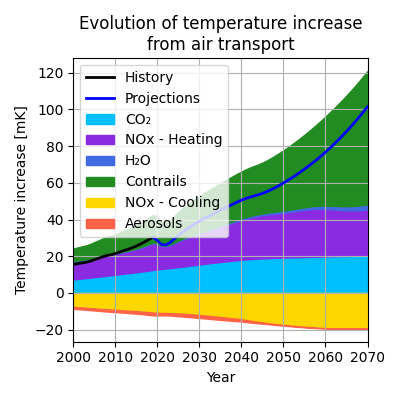

In [10]:
process.plot("detailed_temperature_increase_from_air_transport")

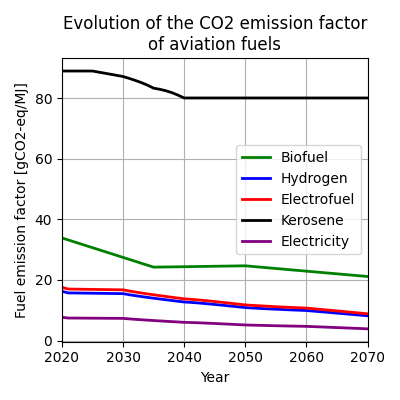

In [11]:
process.plot("emission_factor_per_fuel")

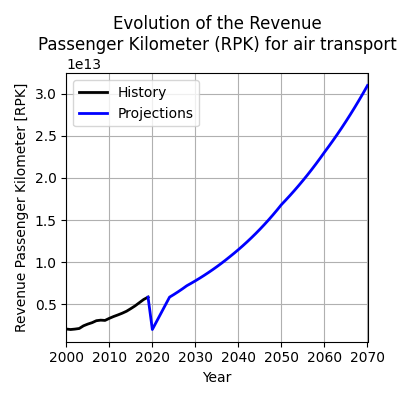

In [12]:
process.plot("revenue_passenger_kilometer")

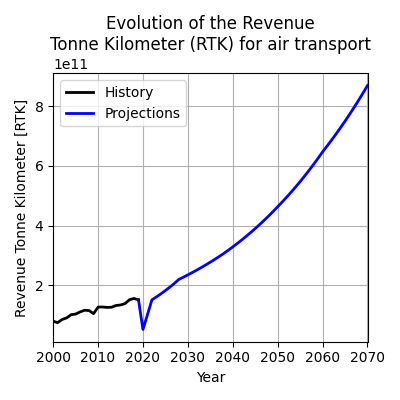

In [13]:
process.plot("revenue_tonne_kilometer")

## end debug zone

In [14]:
process.data["vector_outputs"]["energy_per_ask_mean_without_operations"][2050] * 0.831

0.5880833086747144

In [15]:
process.data["climate_outputs"].loc[
    [2019, 2030, 2040, 2050], ["co2_emissions"]
] * 0.831  # correction to account for scope diffrence

,co2_emissions
2019,608.513406
2030,571.219954
2040,389.127967
2050,195.767096


In [16]:
raw_data = "0,0%1,7%2,8%3,5%3,9%4,8%5,7%6,6%7,4%8,2%9,0%10,5%11,9%13,2%14,5%15,7%16,7%17,6%18,5%19,3%20,0%23,4%26,6%29,7%32,7%35,6%38,3%41,0%43,5%45,9%48,3%49,0%49,6%50,3%50,9%51,5%52,1%52,7%53,3%53,8%54,4%54,1%53,8%53,5%53,2%52,9%52,6%52,3%52,0%51,7%51,4%"

# Convertir en tableau NumPy
data = np.array([float(value.replace(",", ".")) for value in raw_data.split("%") if value])

# Afficher les données avec des virgules
print(", ".join(map(str, data)))

0.0, 1.7, 2.8, 3.5, 3.9, 4.8, 5.7, 6.6, 7.4, 8.2, 9.0, 10.5, 11.9, 13.2, 14.5, 15.7, 16.7, 17.6, 18.5, 19.3, 20.0, 23.4, 26.6, 29.7, 32.7, 35.6, 38.3, 41.0, 43.5, 45.9, 48.3, 49.0, 49.6, 50.3, 50.9, 51.5, 52.1, 52.7, 53.3, 53.8, 54.4, 54.1, 53.8, 53.5, 53.2, 52.9, 52.6, 52.3, 52.0, 51.7, 51.4


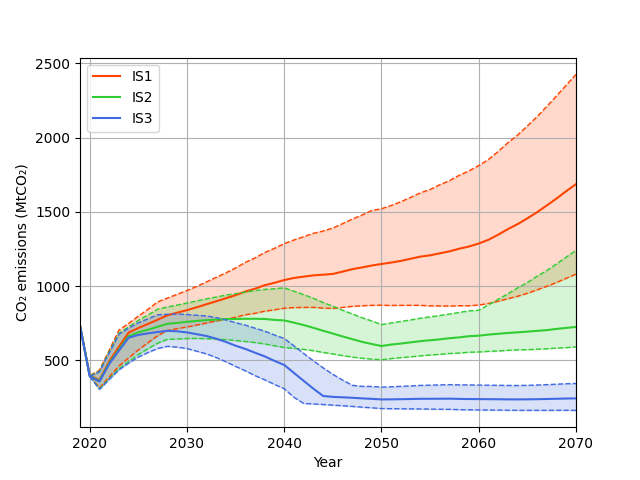

In [17]:
data_years = np.array((range(2019, 2071)))

fig, ax = plt.subplots()

ax.plot(
    data_years,
    process_is1low.data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="orangered",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is1medium.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="orangered",
    linestyle="-",
    label="IS1",
)
ax.plot(
    data_years,
    process_is1high.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="orangered",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is1high.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is1low.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="orangered",
    alpha=0.2,
)

ax.plot(
    data_years,
    process_is2low.data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="limegreen",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is2medium.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="limegreen",
    linestyle="-",
    label="IS2",
)
ax.plot(
    data_years,
    process_is2high.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="limegreen",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is2high.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is2low.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="limegreen",
    alpha=0.2,
)

ax.plot(
    data_years,
    process_is3low.data["climate_outputs"][["co2_emissions"]].values[2019 - 1940 : 2070 - 1940 + 1],
    color="royalblue",
    linestyle="--",
    linewidth=1,
)
ax.plot(
    data_years,
    process_is3medium.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="royalblue",
    linestyle="-",
    label="IS3",
)
ax.plot(
    data_years,
    process_is3high.data["climate_outputs"][["co2_emissions"]].values[
        2019 - 1940 : 2070 - 1940 + 1
    ],
    color="royalblue",
    linestyle="--",
    linewidth=1,
)
ax.fill_between(
    np.array(data_years),
    np.array(
        process_is3high.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    np.array(
        process_is3low.data["climate_outputs"][["co2_emissions"]].values[
            2019 - 1940 : 2070 - 1940 + 1
        ]
    ).reshape(-1),
    color="royalblue",
    alpha=0.2,
)

ax.set(
    xlabel="Year",
    ylabel="CO₂ emissions (MtCO₂)",
)
ax.grid()
plt.xlim(2019, 2070)
plt.legend()
plt.show()

## Cost comparision 

### a)  
First, cumulative cost saving thanks to efficiency (technology and operational) measures is compared between ICAO reference and AeroMAPS simulation.  
Dollars are converted into euros using a 1.1 arbitrary exchange rate, representative of 2020 values.   

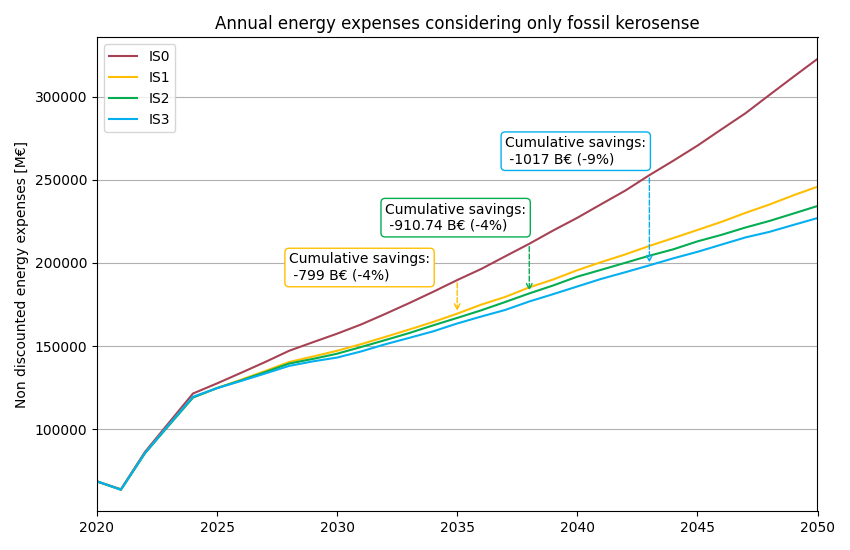

In [18]:
fig_eff,ax = plt.subplots(figsize=(8.5,5.5))

data_years = np.array((range(2019, 2051)))

ax.plot(
    data_years,
    process_is0medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"],
    label="IS0",
    linestyle="-",
    color="#A64253",
)

cumul_is0=process_is0medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"].sum()


ax.plot(
    data_years,
    process_is1medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"],
    label="IS1",
    linestyle="-",
    color="#FEBF02",
)

is1_save=cumul_is0-process_is1medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"].sum()


ax.plot(
    data_years,
    process_is2medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"],
    label="IS2",
    linestyle="-",
    color="#05AD52",
)

is2_save=cumul_is0-process_is2medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"].sum()

ax.plot(
    data_years,
    process_is3medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"],
    label="IS3",
    linestyle="-",
    color="#04AFF0",
)

is3_save=cumul_is0-process_is3medium.data['vector_outputs'].loc[data_years, "non_discounted_full_kero_energy_expenses"].sum()


# Adding textboxes and arrows




ax.annotate(
    f"Cumulative savings:\n {-is1_save/1000:.0f} B€ ({(is1_save/1000-836)/836*100:.0f}%)",
    xytext=(2028, 1.9e5),
    xy=(2028, 1.9e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#FEBF02", facecolor="white"),
)

ax.annotate(
    "",
    xy=(2035,process_is1medium.data['vector_outputs'].loc[2035, "non_discounted_full_kero_energy_expenses"]),
    xytext=(2035,process_is0medium.data['vector_outputs'].loc[2035, "non_discounted_full_kero_energy_expenses"]),
    arrowprops=dict(arrowstyle="->", color="#FEBF02", lw=1, ls='--'),
)



ax.annotate(
    f"Cumulative savings:\n {-is2_save/1000:.2f} B€ ({(is2_save/1000-945)/945*100:.0f}%)",
    xytext=(2032, 2.2e5),
    xy=(2032, 2.2e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#05AD52", facecolor="white"),
)

ax.annotate(
    "",
    xy=(2038,process_is2medium.data['vector_outputs'].loc[2038, "non_discounted_full_kero_energy_expenses"]),
    xytext=(2038,process_is0medium.data['vector_outputs'].loc[2038, "non_discounted_full_kero_energy_expenses"]),
    arrowprops=dict(arrowstyle="->", color="#05AD52", lw=1, ls='--'),
)



ax.annotate(
    f"Cumulative savings:\n {-is3_save/1000:.0f} B€ ({(is3_save/1000-1118)/1118*100:.0f}%)",
    xytext=(2037, 2.6e5),
    xy=(2037, 2.6e5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="#04AFF0", facecolor="white"),
)

ax.annotate(
    "",
    xy=(2043,process_is3medium.data['vector_outputs'].loc[2043, "non_discounted_full_kero_energy_expenses"]),
    xytext=(2043,process_is0medium.data['vector_outputs'].loc[2043, "non_discounted_full_kero_energy_expenses"]),
    arrowprops=dict(arrowstyle="->", color="#04AFF0", lw=1, ls='--'),
)







ax.grid(axis="y")
ax.legend(loc="upper left")
ax.set_title("Annual energy expenses considering only fossil kerosense")
ax.set_ylabel("Non discounted energy expenses [M€]")
ax.set_xlim(2020, 2050)

fig_eff.canvas.header_visible = False
fig_eff.canvas.toolbar_position = "bottom"
fig_eff.tight_layout()

plt.tight_layout()
plt.savefig('cumul_saving_eff.pdf')

### b)
Second, The MFSP of the various illustrative fuels is comapred between our simulation and ICAO values.  
The simulation was callibrated using ICAO CAPEX values but keeping defaut AeroMAPS values for other parameters (efficiency, energy market prices).

In [19]:
is1_bio=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1]
is2_bio=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
is3_bio=[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]

# Conversion to euro per MJ (LHV 34.4 MJ/L)

is1_bio =[el/1.1/34.4 for el in is1_bio]
is2_bio =[el/1.1/34.4 for el in is2_bio]
is3_bio =[el/1.1/34.4 for el in is3_bio]


# CO2 
is1_efuel=[3.8,3.7,3.6,3.5,3.4,3.3,3.2,3.1,3.0,2.9,2.8,2.8,2.7,2.7,2.6,2.6,2.5,2.5,2.4,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.1,2.1,2.1,2.1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0]
is2_efuel=[3.3,3.2,3.1,3.0,2.9,2.8,2.7,2.5,2.4,2.3,2.2,2.2,2.1,2.1,2.1,2.0,2.0,2.0,1.9,1.9,1.9,1.8,1.8,1.8,1.7,1.7,1.7,1.7,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6,1.6]
is3_efuel=[3.001999414, 2.960066128, 2.842790711, 2.725515294, 2.608239877, 2.49096446, 2.373689043, 2.256413626, 2.139138209, 2.021862792, 1.904587375, 1.892056394, 1.875215191, 1.855691712, 1.834385755, 1.811835134, 1.788381071, 1.764250508, 1.739600247, 1.714542109, 1.68915798, 1.655505106, 1.624365894, 1.594808286, 1.566310342, 1.538557021, 1.511346903, 1.484545207, 1.458058334, 1.431819258, 1.405778715, 1.411452667, 1.41685182, 1.421995664, 1.426901891, 1.431586594, 1.436064445, 1.440348848, 1.444452074, 1.448385378, 1.452159099, 1.460294746, 1.468460938, 1.476657848, 1.484885649, 1.493144517, 1.501434627, 1.509756157, 1.518109287, 1.526494196, 1.534911067]

is1_efuel =[el/1.1/34.4 for el in is1_efuel]
is2_efuel =[el/1.1/34.4 for el in is2_efuel]
is3_efuel =[el/1.1/34.4 for el in is3_efuel]

# LH2

is3_lh2 =[6.9,6.6,6.3,6.0,5.7,5.4,5.1,4.8,4.5,4.2,4.0,3.9,3.8,3.7,3.6,3.5,3.5,3.4,3.3,3.2,3.1,3.0,3.0,2.9,2.8,2.8,2.7,2.6,2.5,2.5,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4,2.4]

# Conversion to euro per MJ (LHV 119 MJ/kg)
is3_lh2 =[el/1.1/119 for el in is3_lh2]




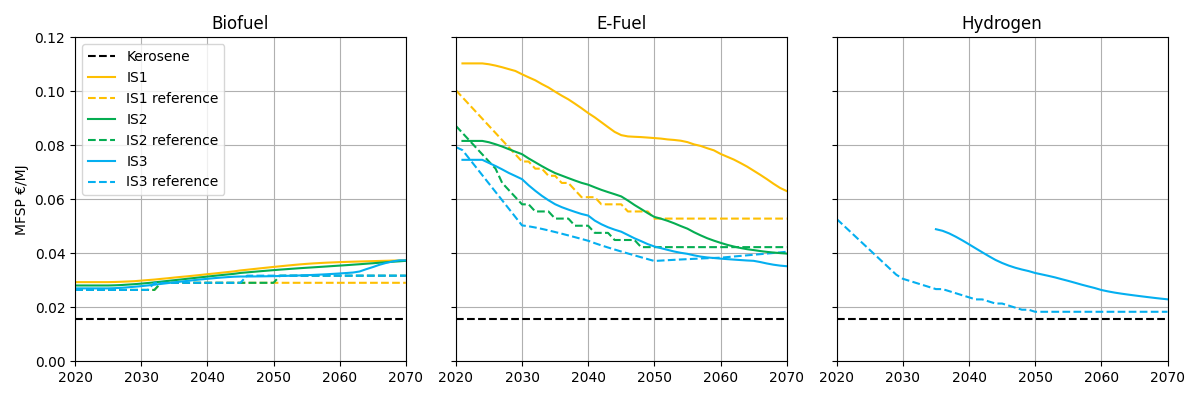

In [20]:
fig_mfsp, (ax0, ax1, ax2) = plt.subplots(1,3,figsize=(12, 4), sharey=True)

years = list(range(2020, 2071))
# 
ax0.plot(years, process_is3medium.data['vector_outputs'].loc[years,'kerosene_market_price']/34.4, color='black', ls='--', label='Kerosene')
ax1.plot(years, process_is3medium.data['vector_outputs'].loc[years,'kerosene_market_price']/34.4, color='black', ls='--', label='Kerosene')
ax2.plot(years, process_is3medium.data['vector_outputs'].loc[years,'kerosene_market_price']/34.4, color='black', ls='--', label='Kerosene')

## BIO (FT-OTHER as Composite pathway)
ax0.plot(years, process_is1medium.data['vector_outputs'].loc[years,'biofuel_ft_others_mfsp']/34.4, color='#FEBF02', label="IS1")
ax0.plot(years, is1_bio, label="IS1 reference", ls='--',color='#FEBF02')
ax0.plot(years, process_is2medium.data['vector_outputs'].loc[years,'biofuel_ft_others_mfsp']/34.4, color='#05AD52', label="IS2")
ax0.plot(years, is2_bio, label="IS2 reference", ls='--',color='#05AD52')
ax0.plot(years, process_is3medium.data['vector_outputs'].loc[years,'biofuel_ft_others_mfsp']/34.4, color='#04AFF0', label="IS3")
ax0.plot(years, is3_bio, label="IS3 reference", ls='--',color='#04AFF0')




## Efuel (CO2 indus + DAC)
ax1.plot(years, is1_efuel, label="IS1 Bio", ls='--',color='#FEBF02')
ax1.plot(years, is2_efuel, label="IS2 Bio", ls='--',color='#05AD52')
ax1.plot(years, is3_efuel, label="IS3 Bio", ls='--',color='#04AFF0')
# 
ax1.plot(years, process_is1medium.data['vector_outputs'].loc[years,'electrofuel_mean_mfsp_litre']/34.4, color='#FEBF02')
ax1.plot(years, process_is2medium.data['vector_outputs'].loc[years,'electrofuel_mean_mfsp_litre']/34.4, color='#05AD52')
ax1.plot(years, process_is3medium.data['vector_outputs'].loc[years,'electrofuel_mean_mfsp_litre']/34.4, color='#04AFF0')

## LH2

ax2.plot(years, is3_lh2, label="IS3 LH2", ls='--',color='#04AFF0')
ax2.plot(years, process_is3medium.data['vector_outputs'].loc[years,'electrolysis_h2_mean_mfsp_kg']/119, color='#04AFF0')

ax0.set_ylim(0,0.12)
ax0.set_ylabel('MFSP €/MJ')

ax0.grid()
ax0.set_xlim(2020,2070)
ax0.set_title('Biofuel')
ax1.grid()
ax1.set_xlim(2020,2070)
ax1.set_title('E-Fuel')
ax2.grid()
ax2.set_xlim(2020,2070)
ax2.set_title('Hydrogen')

ax0.legend(loc='upper left')

plt.tight_layout()
plt.savefig('mfsp_ltag_ref.pdf')


Comments:  
Neat reproduction of ICAO MFSP but major methodological change: everything is included in initial CAPEX, inlcuding electricity generation. It should be modified accordingly. AeroMAPS models can handle this. Potential remaining errors due to different efficiencies, but the order of magnitude is similar for each fuel. Detailled assumptions on plant life, co and by product valorisation, load factors not found or considered.  
A 6.5% private discount rate was used, combined with a 50% load factor for renewables. Despite this we are still above the ICAO values. They seem optimistic. 


### c)
Marginal abatement cost curves - comparision with reference carbon value

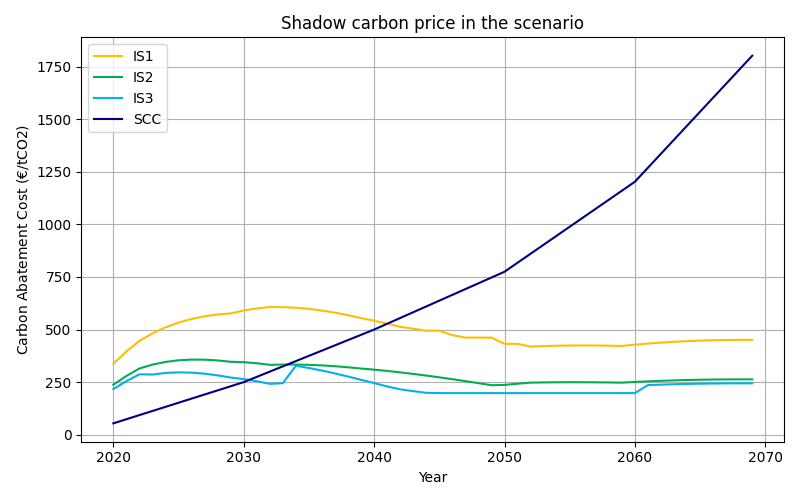

In [21]:
import pandas as pd

fig_scc, ax=plt.subplots(figsize=(8,5))


marginal_cac_is1 = []
marginal_cac_is2 = []
marginal_cac_is3 = []

for process in [process_is1medium, process_is2medium, process_is3medium]:
    for year in range(2019,2071):
        name = []
        vol = []
        cost = []
        spe_cost = []
        g_spe_cost = []

        colors = []

        name.extend(
            [
                el
                for el in [
                "Passenger - Mean",
                "Freighter - Drop in",
                "Freighter - Hydrogen",
                "Freighter - Electric",
                "Bio - HEFA FOG",
                "Bio - HEFA Others",
                "Bio - Alcohol to Jet",
                "Bio - FT MSW",
                "Bio - FT Others",
                "H2C",
                "H2CCCS",
                "H2G",
                "H2GCCS",
                "H2E",
                "Electrofuel",
                "OPS",
                "OPS - Freight",
                "Load Factor",
            ]
            ]
        )

        # Abatement effective in MtCO2e
        vol.extend(
            [
                elt / 1000000
                for elt in [
                process.data['vector_outputs'].aircraft_carbon_abatement_volume_passenger_mean[year],
                process.data['vector_outputs'].aircraft_carbon_abatement_volume_freight_dropin[year],
                process.data['vector_outputs'].aircraft_carbon_abatement_volume_freight_hydrogen[year],
                process.data['vector_outputs'].aircraft_carbon_abatement_volume_freight_electric[year],
                process.data['vector_outputs'].abatement_effective_hefa_fog[year],
                process.data['vector_outputs'].abatement_effective_hefa_others[year],
                process.data['vector_outputs'].abatement_effective_atj[year],
                process.data['vector_outputs'].abatement_effective_ft_msw[year],
                process.data['vector_outputs'].abatement_effective_ft_others[year],
                process.data['vector_outputs'].abatement_effective_hydrogen_coal[year],
                process.data['vector_outputs'].abatement_effective_hydrogen_coal_ccs[year],
                process.data['vector_outputs'].abatement_effective_hydrogen_gas[year],
                process.data['vector_outputs'].abatement_effective_hydrogen_gas_ccs[year],
                process.data['vector_outputs'].abatement_effective_hydrogen_electrolysis[year],
                process.data['vector_outputs'].abatement_effective_electrofuel[year],
                process.data['vector_outputs'].operations_abatement_effective[year],
                process.data['vector_outputs'].operations_abatement_effective_freight[year],
                process.data['vector_outputs'].load_factor_abatement_effective[year],
            ]
            ]
        )

        g_spe_cost.extend(
            [
                el
                for el in [
                process.data['vector_outputs'].aircraft_generic_specific_carbon_abatement_cost_passenger_mean[
                    year
                ],
                process.data['vector_outputs'].aircraft_generic_specific_carbon_abatement_cost_freight_dropin[
                    year
                ],
                process.data['vector_outputs'].aircraft_generic_specific_carbon_abatement_cost_freight_hydrogen[
                    year
                ],
                process.data['vector_outputs'].aircraft_generic_specific_carbon_abatement_cost_freight_electric[
                    year
                ],
                process.data['vector_outputs'].generic_specific_carbon_abatement_cost_hefa_fog[year],
                process.data['vector_outputs'].generic_specific_carbon_abatement_cost_hefa_others[year],
                process.data['vector_outputs'].generic_specific_carbon_abatement_cost_atj[year],
                process.data['vector_outputs'].generic_specific_carbon_abatement_cost_ft_msw[year],
                process.data['vector_outputs'].generic_specific_carbon_abatement_cost_ft_others[year],
                process.data['vector_outputs'].coal_h2_generic_specific_abatement_cost[year],
                process.data['vector_outputs'].coal_ccs_h2_generic_specific_abatement_cost[year],
                process.data['vector_outputs'].gas_h2_generic_specific_abatement_cost[year],
                process.data['vector_outputs'].gas_ccs_h2_generic_specific_abatement_cost[year],
                process.data['vector_outputs'].electrolysis_h2_generic_specific_abatement_cost[year],
                process.data['vector_outputs'].generic_specific_carbon_abatement_cost_electrofuel[year],
                process.data['vector_outputs'].operations_generic_specific_abatement_cost[year],
                process.data['vector_outputs'].operations_generic_specific_abatement_cost_freight[year],
                process.data['vector_outputs'].load_factor_generic_specific_abatement_cost[year],
            ]
            ]
        )

        colors.extend(
            [
                el
                for el in [
                "goldenrod",
                "khaki",
                "khaki",
                "khaki",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "yellowgreen",
                "orange",
                "orange",
                "orange",
            ]
            ]
        )

        macc_df = pd.DataFrame(
            data=[vol, g_spe_cost, colors],
            columns=name,
            index=[
                "abatement_effective",
                "generic_specific_carbon_abatement_cost",
                "colors",
            ],
        )

        macc_df = macc_df.transpose()
        
        macc_df = macc_df.sort_values(by="generic_specific_carbon_abatement_cost")
        macc_df = macc_df.dropna(subset="generic_specific_carbon_abatement_cost")
        
        
        # Plot only made for positive abatements
        maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

        ##### POS ######

        heights_pos = maccpos_df['generic_specific_carbon_abatement_cost'].to_numpy()
        widths_effective_pos = maccpos_df["abatement_effective"].to_numpy()

        if len(widths_effective_pos > 0):
            if process == process_is1medium:
                marginal_cac_is1.append(max(heights_pos))
            elif process == process_is2medium:
                marginal_cac_is2.append(max(heights_pos))
            else:
                marginal_cac_is3.append(max(heights_pos))


years = range(2020, 2070)


ax.plot(
    years,
    marginal_cac_is1,
    color="#FEBF02",
    linestyle="-",
    label="IS1",
)


ax.plot(
    years,
    marginal_cac_is2,
    color="#05AD52",
    linestyle="-",
    label="IS2",
)

ax.plot(
    years,
    marginal_cac_is3,
    color="#04AFF0",
    linestyle="-",
    label="IS3",
)



ax.plot(
    years,
    process_is1medium.data['vector_outputs'].loc[2020:2069,'exogenous_carbon_price_trajectory'],
    color="navy",
    linestyle="-",
    label="SCC",
)


ax.set_title("Shadow carbon price in the scenario")

ax.set_ylabel("Carbon Abatement Cost (€/tCO$\mathregular{2}$)")
ax.set_xlabel("Year")

ax.grid()
ax.legend()
fig_scc.tight_layout()

Interesting to note that the most ambitious scenarios do not call for more expensive CAC options.  
Instead, they relyon on more ambitious cost and emissions assumptions, making the marginal CAC of the IS3 musch lower than that of the IS1.  
Such an consideration might be optimistic ?  
Ambitious SCC trajectory makes all trajetories socially desirable from 2030-2040 onwards.  
Analysis using MACC curve below, with a carbon abatement cost metric suited for non-regular social carbon value.

interactive(children=(IntSlider(value=2050, description='Year:', max=2070, min=2019), FloatText(value=0.0, des…

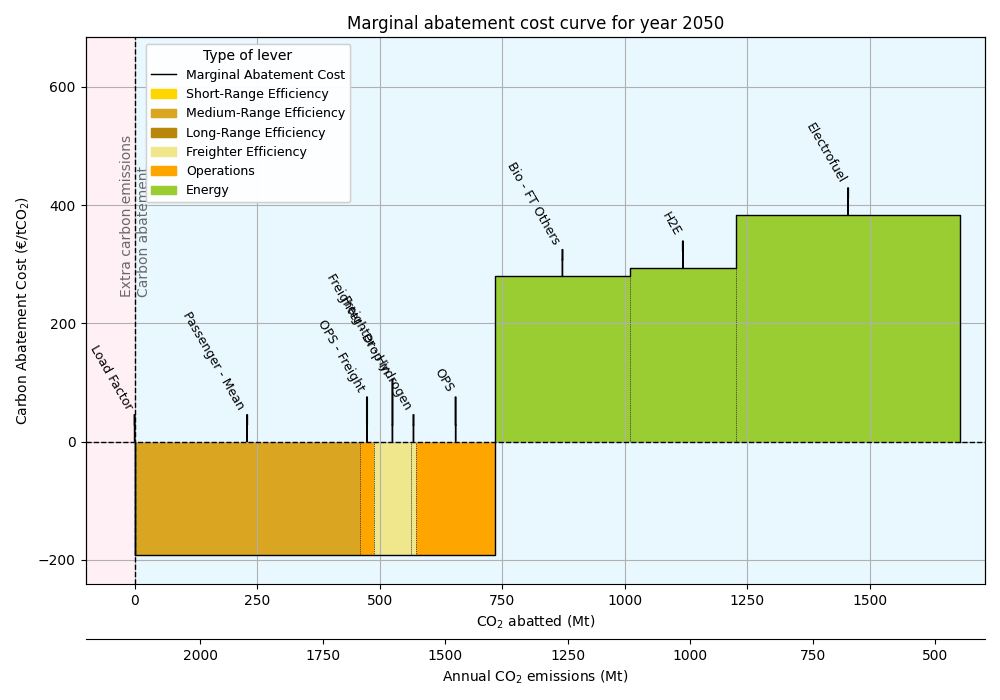

In [22]:
# process_is1medium.plot('annual_MACC_simple_fleet')
# process_is2medium.plot('annual_MACC_simple_fleet')
process_is3medium.plot('annual_MACC_simple_fleet')

__IS1__: Until 2040 E-fuel CAC is too high to be socially desirable. All others are desirable.  
__IS2__: Until 2033 E-fuel CAC is too high to be socially desirable. All others are desirable.  
__IS1__: Until 2030 E-fuel CAC is too high to be socially desirable. All others are desirable, including electrolysis H2 when introduced. 

### d)  
Now let's imagine a worldwide carbon tax is implemented according to the social value trajectory considered here. 
This carbon tax does not necessarily ensure that socially desirable fuels are at anytime cheaper than the fossil kerosene, including the carbon tax. Indeed, the specific carbon abatement cost ensures that, over the lifetime of a fuel production plant and given the trajectory of carbon price, the net present value of the plnats equals 0. Thus, the fuel produced over the lifetime of the plant is indeed cheaper than fossil kerosene avoided, carbon tax considered.  
But that view is efficient only with a social planner or pulic perspective.   
From a private airline perspective, at the begining, SAFs will still be more expensive than fossil kerosene. The instantaneous carbon abatement cost metric does exactly this. 

interactive(children=(IntSlider(value=2035, description='Year:', max=2070, min=2019), Output()), _dom_classes=…

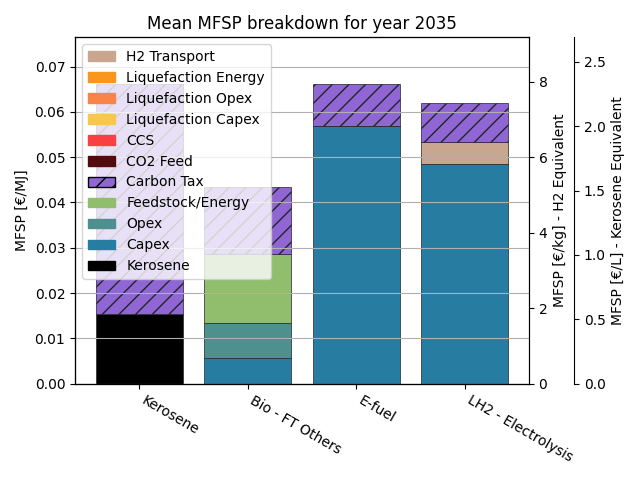

In [23]:
process_is3medium.plot('mfsp_detailled_year')

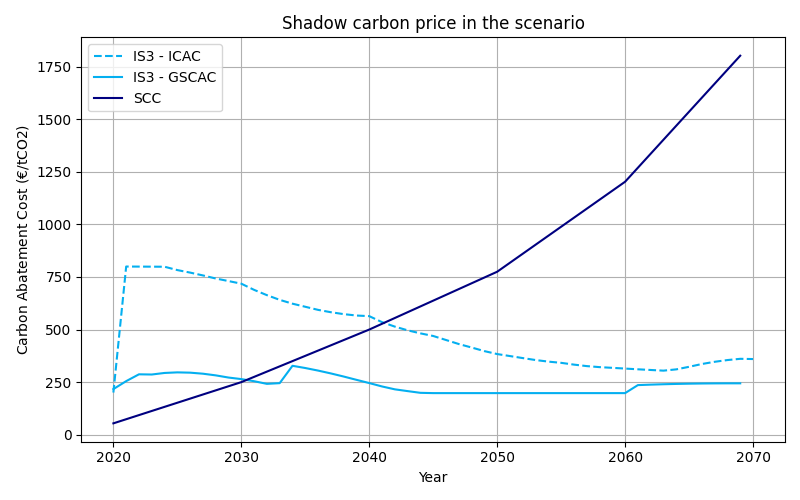

In [31]:
import pandas as pd

fig_scc, ax=plt.subplots(figsize=(8,5))


marginal_cac_instant_is3 = []


for year in range(2019,2071):
    name = []
    vol = []
    cost = []
    spe_cost = []
    g_spe_cost = []

    colors = []

    name.extend(
        [
            el
            for el in [
            "Passenger - Mean",
            "Freighter - Drop in",
            "Freighter - Hydrogen",
            "Freighter - Electric",
            "Bio - HEFA FOG",
            "Bio - HEFA Others",
            "Bio - Alcohol to Jet",
            "Bio - FT MSW",
            "Bio - FT Others",
            "H2C",
            "H2CCCS",
            "H2G",
            "H2GCCS",
            "H2E",
            "Electrofuel",
            "OPS",
            "OPS - Freight",
            "Load Factor",
        ]
        ]
    )

    # Abatement effective in MtCO2e
    vol.extend(
        [
            elt / 1000000
            for elt in [
            process.data['vector_outputs'].aircraft_carbon_abatement_volume_passenger_mean[year],
            process.data['vector_outputs'].aircraft_carbon_abatement_volume_freight_dropin[year],
            process.data['vector_outputs'].aircraft_carbon_abatement_volume_freight_hydrogen[year],
            process.data['vector_outputs'].aircraft_carbon_abatement_volume_freight_electric[year],
            process.data['vector_outputs'].abatement_effective_hefa_fog[year],
            process.data['vector_outputs'].abatement_effective_hefa_others[year],
            process.data['vector_outputs'].abatement_effective_atj[year],
            process.data['vector_outputs'].abatement_effective_ft_msw[year],
            process.data['vector_outputs'].abatement_effective_ft_others[year],
            process.data['vector_outputs'].abatement_effective_hydrogen_coal[year],
            process.data['vector_outputs'].abatement_effective_hydrogen_coal_ccs[year],
            process.data['vector_outputs'].abatement_effective_hydrogen_gas[year],
            process.data['vector_outputs'].abatement_effective_hydrogen_gas_ccs[year],
            process.data['vector_outputs'].abatement_effective_hydrogen_electrolysis[year],
            process.data['vector_outputs'].abatement_effective_electrofuel[year],
            process.data['vector_outputs'].operations_abatement_effective[year],
            process.data['vector_outputs'].operations_abatement_effective_freight[year],
            process.data['vector_outputs'].load_factor_abatement_effective[year],
        ]
        ]
    )

    g_spe_cost.extend(
        [
            el
            for el in [
            process.data['vector_outputs'].aircraft_carbon_abatement_cost_passenger_mean[
                year
            ],
            process.data['vector_outputs'].aircraft_carbon_abatement_cost_freight_dropin[
                year
            ],
            process.data['vector_outputs'].aircraft_carbon_abatement_cost_freight_hydrogen[
                year
            ],
            process.data['vector_outputs'].aircraft_carbon_abatement_cost_freight_electric[
                year
            ],
            process.data['vector_outputs'].carbon_abatement_cost_hefa_fog[year],
            process.data['vector_outputs'].carbon_abatement_cost_hefa_others[year],
            process.data['vector_outputs'].carbon_abatement_cost_atj[year],
            process.data['vector_outputs'].carbon_abatement_cost_ft_msw[year],
            process.data['vector_outputs'].carbon_abatement_cost_ft_others[year],
            process.data['vector_outputs'].carbon_abatement_cost_h2_coal[year],
            process.data['vector_outputs'].carbon_abatement_cost_h2_coal_ccs[year],
            process.data['vector_outputs'].carbon_abatement_cost_h2_gas[year],
            process.data['vector_outputs'].carbon_abatement_cost_h2_gas_ccs[year],
            process.data['vector_outputs'].carbon_abatement_cost_h2_electrolysis[year],
            process.data['vector_outputs'].carbon_abatement_cost_electrofuel[year],
            process.data['vector_outputs'].operations_abatement_cost[year],
            process.data['vector_outputs'].operations_abatement_cost_freight[year],
            process.data['vector_outputs'].load_factor_abatement_cost[year],
        ]
        ]
    )

    colors.extend(
        [
            el
            for el in [
            "goldenrod",
            "khaki",
            "khaki",
            "khaki",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "yellowgreen",
            "orange",
            "orange",
            "orange",
        ]
        ]
    )

    macc_df = pd.DataFrame(
        data=[vol, g_spe_cost, colors],
        columns=name,
        index=[
            "abatement_effective",
            "carbon_abatement_cost",
            "colors",
        ],
    )

    macc_df = macc_df.transpose()

    macc_df = macc_df.sort_values(by="carbon_abatement_cost")
    macc_df = macc_df.dropna(subset="carbon_abatement_cost")


    # Plot only made for positive abatements
    maccpos_df = macc_df[macc_df["abatement_effective"] > 0]

    ##### POS ######

    heights_pos = maccpos_df['carbon_abatement_cost'].to_numpy()
    widths_effective_pos = maccpos_df["abatement_effective"].to_numpy()

    if len(widths_effective_pos > 0):
        marginal_cac_instant_is3.append(max(heights_pos))


years = range(2020, 2071)


ax.plot(
    years,
    marginal_cac_instant_is3,
    color="#04AFF0",
    linestyle="--",
    label="IS3 - ICAC",
)

years = range(2020, 2070)



ax.plot(
    years,
    marginal_cac_is3,
    color="#04AFF0",
    linestyle="-",
    label="IS3 - GSCAC",
)



ax.plot(
    years,
    process_is1medium.data['vector_outputs'].loc[2020:2069,'exogenous_carbon_price_trajectory'],
    color="navy",
    linestyle="-",
    label="SCC",
)



ax.set_title("Shadow carbon price in the scenario")
ax.set_ylabel("Carbon Abatement Cost (€/tCO$\mathregular{2}$)")
ax.set_xlabel("Year")

ax.grid()
ax.legend()
fig_scc.tight_layout()

In [25]:
marginal_cac_is3

[216.87014573621323,
 254.70327554087146,
 287.1846635829469,
 286.21170625422354,
 293.6444963157458,
 296.4132061152142,
 295.00711277431947,
 290.07170695509853,
 282.1712073766741,
 271.76717249804904,
 264.4462154634322,
 254.3283347318599,
 241.81240125071818,
 245.1434231049952,
 327.67829269002215,
 317.1039850240051,
 304.9221616789612,
 291.36428797400333,
 276.63233052766367,
 260.9092932261806,
 245.53361597901053,
 229.41391645568072,
 215.731333340276,
 207.269021497391,
 199.10589496485497,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 197.773132825366,
 235.8504090870398,
 238.08832800574635,
 239.95723162637537,
 241.47393599005133,
 242.65630350934345,
 243.51844294193324,
 244.07097867443355,
 244.32680592913943,
 244.3268059291394